In [2]:
!pip -q install lightgbm kaggle

In [3]:
import os, zipfile, pathlib

In [4]:
!kaggle competitions download -c m5-forecasting-accuracy -p /content

m5-forecasting-accuracy.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
zip_path = "/content/m5-forecasting-accuracy.zip"
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall("/content/m5")

In [6]:
print("Extracted files:", os.listdir("/content/m5")[:10])

Extracted files: ['sales_train_validation.csv', 'sell_prices.csv', 'calendar.csv', 'sales_train_evaluation.csv', 'sample_submission.csv']


In [7]:
import pandas as pd

In [8]:
sales = pd.read_csv("/content/m5/sales_train_validation.csv")
cal = pd.read_csv("/content/m5/calendar.csv")
price = pd.read_csv("/content/m5/sell_prices.csv")

In [9]:
print(sales.shape, cal.shape, price.shape)

(30490, 1919) (1969, 14) (6841121, 4)


In [10]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [11]:
sales['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [12]:
stores_keep = sales['store_id'].unique()[:3]
stores_keep

array(['CA_1', 'CA_2', 'CA_3'], dtype=object)

In [13]:
sales_sub = sales[sales['store_id'].isin(stores_keep)].copy()

In [14]:
print("Stores:", stores_keep)
print("Subset shape:", sales_sub.shape)

Stores: ['CA_1' 'CA_2' 'CA_3']
Subset shape: (9147, 1919)


In [15]:
sales_sub.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,9147.00000,9147.000000,9147.000000,9147.000000,9147.000000,...,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000
mean,1.374221,1.314967,0.953537,1.050290,0.917131,1.08593,1.178747,1.598557,1.407893,1.124631,...,1.504209,1.937794,2.184869,1.557123,1.432929,1.382748,1.315185,1.581611,2.064065,2.177326
std,6.050502,6.872250,4.145680,5.545972,4.759044,5.52697,6.410725,7.693306,7.009780,5.695897,...,3.543898,4.496027,5.253724,3.684070,3.422051,3.167857,3.196774,3.746882,4.468375,4.511792
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3.000000
max,360.000000,436.000000,207.000000,323.000000,296.000000,314.00000,316.000000,370.000000,385.000000,353.000000,...,129.000000,160.000000,204.000000,86.000000,100.000000,88.000000,77.000000,141.000000,139.000000,130.000000


In [16]:
sales_sub.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [17]:
id_cols = ['id','item_id','dept_id','cat_id','store_id','state_id']

In [18]:
sales_long = sales_sub.melt(
    id_vars=id_cols,
    var_name="d",
    value_name="sales"
)

In [19]:
print(sales_long.shape)

(17498211, 8)


In [20]:
sales_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [21]:
cal_small = cal[['d','date','wm_yr_wk','weekday','wday','month','year',
                 'event_name_1','event_type_1','event_name_2','event_type_2',
                 'snap_CA','snap_TX','snap_WI']].copy()

In [22]:
cal_small['date'] = pd.to_datetime(cal_small['date'])

In [23]:
data = sales_long.merge(cal_small, on="d", how="left")

In [24]:
print(data.shape)

(17498211, 21)


In [25]:
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0


In [26]:
data = data.merge(
    price,
    on=['store_id','item_id','wm_yr_wk'],
    how='left'
)

In [27]:
print(data.shape)

(17498211, 22)


In [28]:
data[['store_id','item_id','date','sales','sell_price']].head()

,store_id,item_id,date,sales,sell_price
0,CA_1,HOBBIES_1_001,2011-01-29,0,NaN
1,CA_1,HOBBIES_1_002,2011-01-29,0,NaN
2,CA_1,HOBBIES_1_003,2011-01-29,0,NaN
3,CA_1,HOBBIES_1_004,2011-01-29,0,NaN
4,CA_1,HOBBIES_1_005,2011-01-29,0,NaN


In [29]:
import numpy as np
import pandas as pd

In [30]:
data = data.sort_values(['id','date']).reset_index(drop=True)

In [31]:
for c in ['event_name_1','event_type_1','event_name_2','event_type_2']:
    data[c] = data[c].fillna("none")

In [32]:
data['sell_price'] = data['sell_price'].fillna(0.0).astype(np.float32)

In [33]:
for lag in [7, 28]:
    data[f'lag_{lag}'] = data.groupby('id')['sales'].shift(lag)

In [34]:
data['lag_1'] = data.groupby('id')['sales'].shift(1)

for win in [7, 28]:
    data[f'roll_mean_{win}'] = (
        data.groupby('id')['lag_1']
            .rolling(win)
            .mean()
            .reset_index(level=0, drop=True)
    )

In [35]:
data['day'] = data['date'].dt.day.astype(np.int16)
data['weekofyear'] = data['date'].dt.isocalendar().week.astype(int)

In [36]:
data[['id','date','sales','sell_price','lag_7','lag_28','roll_mean_7','roll_mean_28']].head(20)

,id,date,sales,sell_price,lag_7,lag_28,roll_mean_7,roll_mean_28
0,FOODS_1_001_CA_1_validation,2011-01-29,3,2.0,NaN,NaN,NaN,NaN
1,FOODS_1_001_CA_1_validation,2011-01-30,0,2.0,NaN,NaN,NaN,NaN
2,FOODS_1_001_CA_1_validation,2011-01-31,0,2.0,NaN,NaN,NaN,NaN
3,FOODS_1_001_CA_1_validation,2011-02-01,1,2.0,NaN,NaN,NaN,NaN
4,FOODS_1_001_CA_1_validation,2011-02-02,4,2.0,NaN,NaN,NaN,NaN
5,FOODS_1_001_CA_1_validation,2011-02-03,2,2.0,NaN,NaN,NaN,NaN
6,FOODS_1_001_CA_1_validation,2011-02-04,0,2.0,NaN,NaN,NaN,NaN
7,FOODS_1_001_CA_1_validation,2011-02-05,2,2.0,3.0,NaN,1.428571,NaN
8,FOODS_1_001_CA_1_validation,2011-02-06,0,2.0,0.0,NaN,1.285714,NaN
9,FOODS_1_001_CA_1_validation,2011-02-07,0,2.0,0.0,NaN,1.285714,NaN


In [37]:
data_model = data.dropna(subset=['lag_7','lag_28','roll_mean_7','roll_mean_28']).copy()
print("After dropna:", data_model.shape)

After dropna: (17242095, 29)


In [38]:
max_date = data_model['date'].max()
val_start = max_date - pd.Timedelta(days=27)

In [39]:
train_df = data_model[data_model['date'] < val_start].copy()
val_df   = data_model[data_model['date'] >= val_start].copy()

In [60]:
import gc

In [61]:
del sales_long, sales_sub, sales
gc.collect()

NameError: name 'sales_long' is not defined

In [42]:
del data
gc.collect()

26

In [43]:
print(train_df.shape, val_df.shape)

(16985979, 29) (256116, 29)


In [45]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
baseline_pred = val_df['lag_7'].astype(np.float32).values
y_val = val_df['sales'].astype(np.float32).values

In [48]:
mse_b = mean_squared_error(y_val, baseline_pred)
rmse_b = np.sqrt(mse_b)
mae_b  = mean_absolute_error(y_val, baseline_pred)

In [49]:
print("Baseline RMSE:", rmse_b)
print("Baseline MAE :", mae_b)

Baseline RMSE: 2.9535685211235863
Baseline MAE : 1.415870189666748


In [62]:
import lightgbm as lgb

In [63]:
target = 'sales'

In [64]:
cat_features = ['item_id','dept_id','cat_id','store_id','state_id',
                'weekday','event_name_1','event_type_1','event_name_2','event_type_2']

In [65]:
for c in cat_features:
    train_df[c] = train_df[c].astype('category')
    val_df[c]   = val_df[c].astype('category')

In [66]:
for c in cat_features:
    val_df[c] = val_df[c].cat.set_categories(train_df[c].cat.categories)

In [67]:
num_features = ['wday','month','year','day','weekofyear','sell_price',
                'lag_7','lag_28','roll_mean_7','roll_mean_28',
                'snap_CA','snap_TX','snap_WI']

In [68]:
features = cat_features + num_features

In [69]:
X_train = train_df[features]
y_train = train_df[target].astype('float32')

In [70]:
X_val = val_df[features]
y_val = val_df[target].astype('float32')

In [71]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=cat_features, free_raw_data=False)
lgb_val   = lgb.Dataset(X_val, y_val, categorical_feature=cat_features, free_raw_data=False)

In [72]:
params = {
    "objective": "regression",
    "metric": "rmse",
    "learning_rate": 0.05,
    "num_leaves": 64,
    "min_data_in_leaf": 80,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 1,
    "seed": 42,
    "verbosity": -1
}

In [73]:
model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    num_boost_round=1200,
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(100)]
)

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 2.35035	valid_1's rmse: 2.14763
[200]	training's rmse: 2.30513	valid_1's rmse: 2.14272
[300]	training's rmse: 2.27855	valid_1's rmse: 2.13845
[400]	training's rmse: 2.25882	valid_1's rmse: 2.13641
Early stopping, best iteration is:
[385]	training's rmse: 2.26146	valid_1's rmse: 2.13624


In [74]:
val_pred = model.predict(X_val, num_iteration=model.best_iteration)

In [75]:
rmse = np.sqrt(mean_squared_error(y_val, val_pred))
mae  = mean_absolute_error(y_val, val_pred)

In [76]:
print("LightGBM RMSE:", rmse)
print("LightGBM MAE :", mae)
print("Best iteration:", model.best_iteration)

LightGBM RMSE: 2.1362395033051267
LightGBM MAE : 1.124033659584785
Best iteration: 385


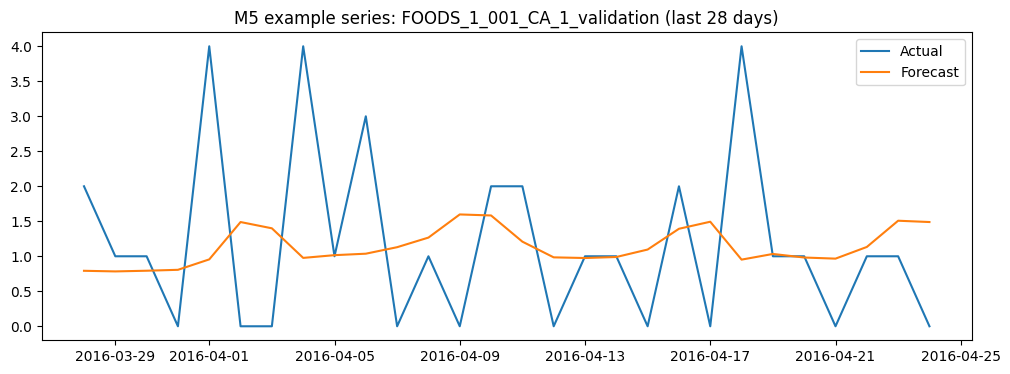

In [77]:
import matplotlib.pyplot as plt

features = cat_features + num_features  # на всякий
example_id = val_df['id'].iloc[0]

one_val = val_df[val_df['id'] == example_id].copy()
one_val = one_val.sort_values('date')
one_val['pred'] = model.predict(one_val[features], num_iteration=model.best_iteration)

plt.figure(figsize=(12,4))
plt.plot(one_val['date'], one_val['sales'], label="Actual")
plt.plot(one_val['date'], one_val['pred'], label="Forecast")
plt.title(f"M5 example series: {example_id} (last 28 days)")
plt.legend()
plt.show()

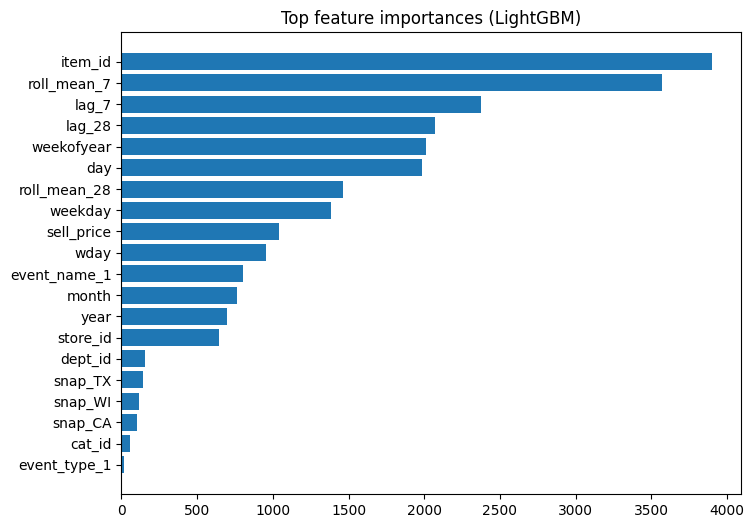

In [79]:
import matplotlib.pyplot as plt

topk = 20
plt.figure(figsize=(8,6))
plt.barh(imp.head(topk)['feature'][::-1], imp.head(topk)['importance'][::-1])
plt.title("Top feature importances (LightGBM)")
plt.show()

In [80]:
import numpy as np

val_eval = val_df[['id','store_id','cat_id','date','sales']].copy()
val_eval['pred'] = model.predict(val_df[features], num_iteration=model.best_iteration)
val_eval['abs_err'] = np.abs(val_eval['sales'].astype(float) - val_eval['pred'])

by_store = val_eval.groupby('store_id')['abs_err'].mean().sort_values()
by_cat   = val_eval.groupby('cat_id')['abs_err'].mean().sort_values()

print("Mean absolute error by store:")
display(by_store)

print("Mean absolute error by category:")
display(by_cat)

Mean absolute error by store:


/tmp/ipykernel_206/2610796671.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_store = val_eval.groupby('store_id')['abs_err'].mean().sort_values()
/tmp/ipykernel_206/2610796671.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_cat   = val_eval.groupby('cat_id')['abs_err'].mean().sort_values()


store_id
CA_1    1.040547
CA_2    1.050813
CA_3    1.280741
Name: abs_err, dtype: float64

Mean absolute error by category:


cat_id
HOBBIES      0.884528
HOUSEHOLD    0.902899
FOODS        1.379322
Name: abs_err, dtype: float64

In [82]:
import pandas as pd
import numpy as np

results_df = pd.DataFrame({
    "Model": ["Baseline (lag_7)", "LightGBM"],
    "RMSE": [rmse_b, rmse],
    "MAE": [mae_b, mae]
})

results_df

,Model,RMSE,MAE
0,Baseline (lag_7),2.953569,1.415870
1,LightGBM,2.136240,1.124034


In [83]:
mean_sales = y_val.mean()

results_df["NRMSE"] = results_df["RMSE"] / mean_sales
results_df

,Model,RMSE,MAE,NRMSE
0,Baseline (lag_7),2.953569,1.415870,1.759372
1,LightGBM,2.136240,1.124034,1.272508


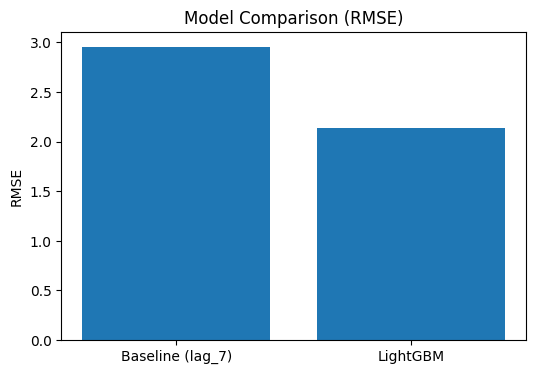

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(results_df["Model"], results_df["RMSE"])
plt.title("Model Comparison (RMSE)")
plt.ylabel("RMSE")
plt.show()

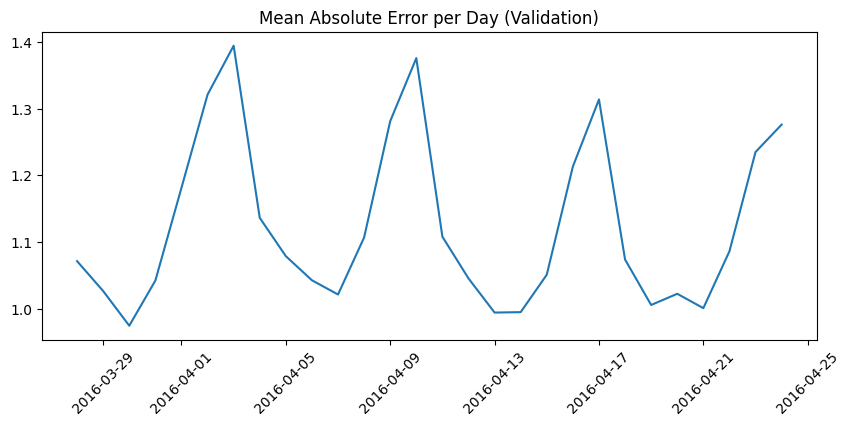

In [85]:
val_eval = val_df[['date','sales']].copy()
val_eval['pred'] = val_pred
val_eval['abs_err'] = np.abs(val_eval['sales'] - val_eval['pred'])

daily_error = val_eval.groupby('date')['abs_err'].mean()

plt.figure(figsize=(10,4))
plt.plot(daily_error.index, daily_error.values)
plt.title("Mean Absolute Error per Day (Validation)")
plt.xticks(rotation=45)
plt.show()

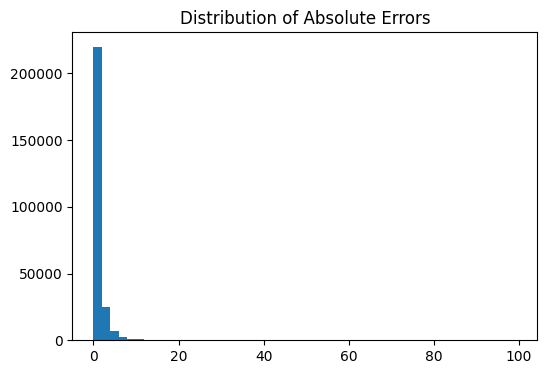

In [86]:
plt.figure(figsize=(6,4))
plt.hist(val_eval['abs_err'], bins=50)
plt.title("Distribution of Absolute Errors")
plt.show()

In [87]:
imp.to_csv("feature_importance.csv", index=False)
imp.head(15)

,feature,importance
0,item_id,3900
18,roll_mean_7,3571
16,lag_7,2377
17,lag_28,2069
14,weekofyear,2010
13,day,1984
19,roll_mean_28,1462
5,weekday,1383
15,sell_price,1038
10,wday,954


In [88]:
results_df.to_csv("model_results.csv", index=False)

In [89]:
cutoff_date = train_df['date'].max() - pd.DateOffset(years=2)

In [90]:
train_recent = train_df[train_df['date'] >= cutoff_date].copy()

In [91]:
print("Old train shape:", train_df.shape)
print("Recent train shape:", train_recent.shape)

Old train shape: (16985979, 29)
Recent train shape: (6695604, 29)


In [92]:
X_train_recent = train_recent[features]
y_train_recent = train_recent[target].astype(np.float32)

lgb_train_recent = lgb.Dataset(
    X_train_recent, 
    y_train_recent,
    categorical_feature=cat_features,
    free_raw_data=False
)

model_recent = lgb.train(
    params,
    lgb_train_recent,
    valid_sets=[lgb_train_recent, lgb_val],
    num_boost_round=1200,
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(100)]
)

val_pred_recent = model_recent.predict(X_val, num_iteration=model_recent.best_iteration)

rmse_recent = np.sqrt(mean_squared_error(y_val, val_pred_recent))
mae_recent  = mean_absolute_error(y_val, val_pred_recent)

print("LightGBM (last 2 years) RMSE:", rmse_recent)
print("LightGBM (last 2 years) MAE :", mae_recent)

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 2.24532	valid_1's rmse: 2.13864
[200]	training's rmse: 2.19917	valid_1's rmse: 2.1331
Early stopping, best iteration is:
[220]	training's rmse: 2.19279	valid_1's rmse: 2.13245
LightGBM (last 2 years) RMSE: 2.132453596074789
LightGBM (last 2 years) MAE : 1.1224343342901038


In [94]:
new_row = pd.DataFrame([{
    "Model": "LightGBM (last 2y)",
    "RMSE": rmse_recent,
    "MAE": mae_recent,
    "NRMSE": rmse_recent / mean_sales
}])

results_df = pd.concat([results_df, new_row], ignore_index=True)

results_df

,Model,RMSE,MAE,NRMSE
0,Baseline (lag_7),2.953569,1.415870,1.759372
1,LightGBM,2.136240,1.124034,1.272508
2,LightGBM (last 2y),2.132454,1.122434,1.270253


In [95]:
store_daily = (
    train_df[['store_id','date','sales']]
    .groupby(['store_id','date'], as_index=False)
    .sum()
    .rename(columns={'sales':'store_total_sales'})
)

store_daily = store_daily.sort_values(['store_id','date'])

store_daily['store_lag_7'] = (
    store_daily.groupby('store_id')['store_total_sales']
    .shift(7)
)

/tmp/ipykernel_206/3528388188.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['store_id','date'], as_index=False)
/tmp/ipykernel_206/3528388188.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_daily.groupby('store_id')['store_total_sales']


In [96]:
train_df = train_df.merge(
    store_daily[['store_id','date','store_lag_7']],
    on=['store_id','date'],
    how='left'
)

val_df = val_df.merge(
    store_daily[['store_id','date','store_lag_7']],
    on=['store_id','date'],
    how='left'
)

train_df['store_lag_7'] = train_df['store_lag_7'].fillna(0).astype('float32')
val_df['store_lag_7']   = val_df['store_lag_7'].fillna(0).astype('float32')

In [97]:
num_features3 = num_features + ['store_lag_7']
features3 = cat_features + num_features3

In [98]:
X_train3 = train_df[features3]
y_train3 = train_df['sales'].astype('float32')

X_val3 = val_df[features3]
y_val3 = val_df['sales'].astype('float32')

lgb_train3 = lgb.Dataset(X_train3, y_train3, categorical_feature=cat_features, free_raw_data=False)
lgb_val3   = lgb.Dataset(X_val3, y_val3, categorical_feature=cat_features, free_raw_data=False)

model3 = lgb.train(
    params,
    lgb_train3,
    valid_sets=[lgb_train3, lgb_val3],
    num_boost_round=800,
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(100)]
)

val_pred3 = model3.predict(X_val3, num_iteration=model3.best_iteration)

rmse3 = np.sqrt(mean_squared_error(y_val3, val_pred3))
mae3  = mean_absolute_error(y_val3, val_pred3)

print("LightGBM + store lag RMSE:", rmse3)
print("LightGBM + store lag MAE :", mae3)

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 2.34757	valid_1's rmse: 2.14924
[200]	training's rmse: 2.30117	valid_1's rmse: 2.14462
[300]	training's rmse: 2.27271	valid_1's rmse: 2.14366
[400]	training's rmse: 2.2516	valid_1's rmse: 2.14274
Early stopping, best iteration is:
[436]	training's rmse: 2.24483	valid_1's rmse: 2.14179
LightGBM + store lag RMSE: 2.1417868188129043
LightGBM + store lag MAE : 1.1170070867857151


In [99]:
del store_daily
gc.collect()

5519

In [100]:
import pandas as pd
import numpy as np

final_results = pd.DataFrame({
    "Model": [
        "Baseline (lag_7)",
        "LightGBM (full train)",
        "LightGBM (last 2 years)",
        "LightGBM (+ store lag)"
    ],
    "RMSE": [
        rmse_b,
        rmse,
        rmse_recent,
        rmse3
    ],
    "MAE": [
        mae_b,
        mae,
        mae_recent,
        mae3
    ]
})

mean_sales = y_val.mean()
final_results["NRMSE"] = final_results["RMSE"] / mean_sales

final_results

,Model,RMSE,MAE,NRMSE
0,Baseline (lag_7),2.953569,1.415870,1.759372
1,LightGBM (full train),2.136240,1.124034,1.272508
2,LightGBM (last 2 years),2.132454,1.122434,1.270253
3,LightGBM (+ store lag),2.141787,1.117007,1.275813


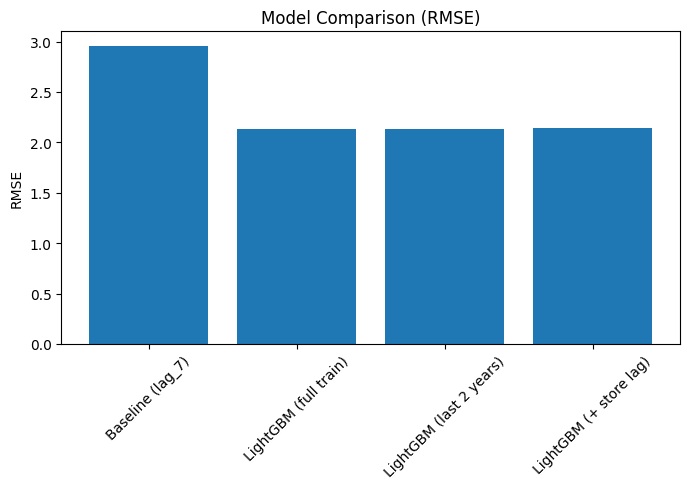

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.bar(final_results["Model"], final_results["RMSE"])
plt.xticks(rotation=45)
plt.title("Model Comparison (RMSE)")
plt.ylabel("RMSE")
plt.tight_layout()
plt.savefig("model_comparison_rmse.png")
plt.show()

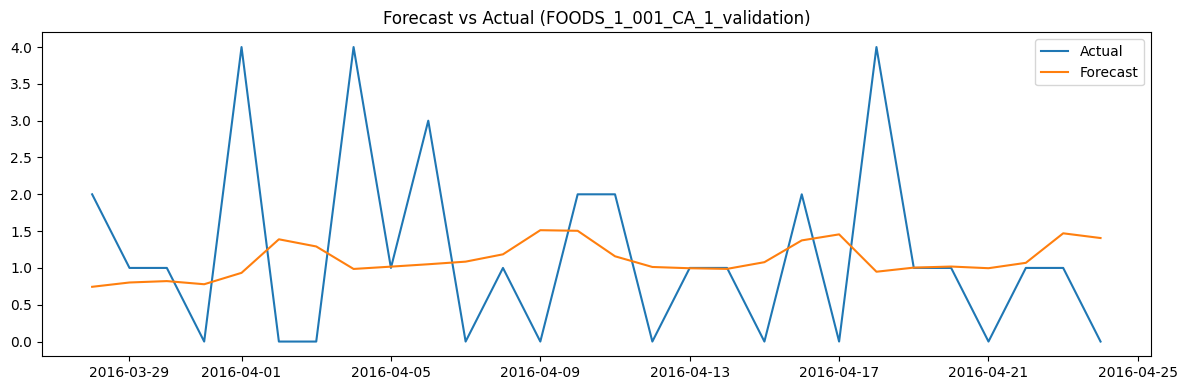

In [102]:
example_id = val_df['id'].iloc[0]

one_val = val_df[val_df['id'] == example_id].copy()
one_val = one_val.sort_values('date')
one_val['pred'] = model_recent.predict(
    one_val[features], 
    num_iteration=model_recent.best_iteration
)

plt.figure(figsize=(12,4))
plt.plot(one_val['date'], one_val['sales'], label="Actual")
plt.plot(one_val['date'], one_val['pred'], label="Forecast")
plt.title(f"Forecast vs Actual ({example_id})")
plt.legend()
plt.tight_layout()
plt.savefig("forecast_vs_actual.png")
plt.show()

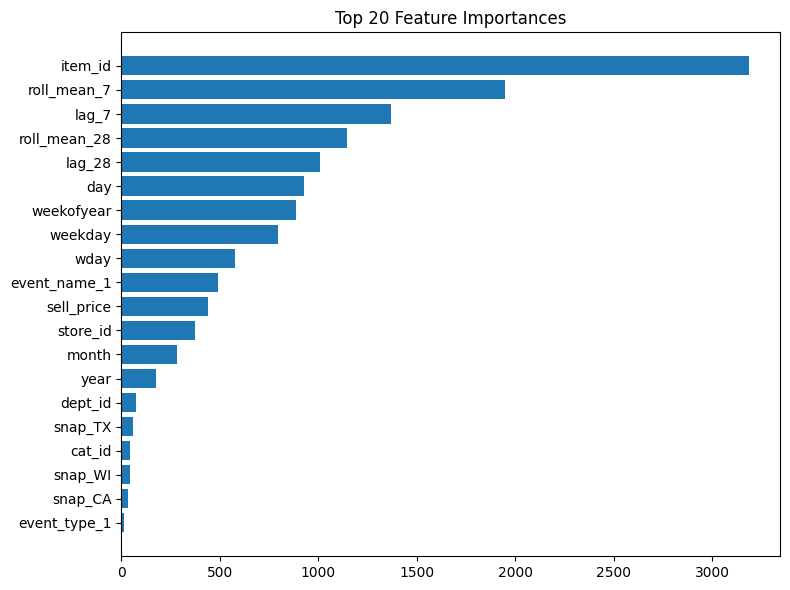

,feature,importance
0,item_id,3184
18,roll_mean_7,1948
16,lag_7,1368
19,roll_mean_28,1145
17,lag_28,1007
13,day,927
14,weekofyear,886
5,weekday,793
10,wday,578
6,event_name_1,488


In [103]:
importance_df = pd.DataFrame({
    "feature": features,
    "importance": model_recent.feature_importance()
}).sort_values("importance", ascending=False)

importance_df.to_csv("feature_importance.csv", index=False)

plt.figure(figsize=(8,6))
plt.barh(
    importance_df.head(20)["feature"][::-1],
    importance_df.head(20)["importance"][::-1]
)
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()

importance_df.head(15)

In [104]:
val_eval = val_df[['store_id','cat_id','sales']].copy()
val_eval['pred'] = model_recent.predict(
    val_df[features], 
    num_iteration=model_recent.best_iteration
)
val_eval['abs_err'] = np.abs(val_eval['sales'] - val_eval['pred'])

error_by_store = val_eval.groupby('store_id')['abs_err'].mean()
error_by_cat   = val_eval.groupby('cat_id')['abs_err'].mean()

error_by_store.to_csv("error_by_store.csv")
error_by_cat.to_csv("error_by_category.csv")

print("Error by Store:")
display(error_by_store)

print("Error by Category:")
display(error_by_cat)

Error by Store:


/tmp/ipykernel_206/3539967541.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_by_store = val_eval.groupby('store_id')['abs_err'].mean()
/tmp/ipykernel_206/3539967541.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_by_cat   = val_eval.groupby('cat_id')['abs_err'].mean()


store_id
CA_1    1.040884
CA_2    1.048205
CA_3    1.278214
Name: abs_err, dtype: float64

Error by Category:


cat_id
FOODS        1.377313
HOBBIES      0.881377
HOUSEHOLD    0.902699
Name: abs_err, dtype: float64